In [71]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data_path = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/yelp_labelled.txt"
            )
yelp = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp.columns = ['message', 'rating']

In [73]:
yelp.head()

,message,rating
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [74]:
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp[str(key)] = yelp.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [75]:
yelp['allcaps'] = yelp.message.str.isupper()
yelp['Positive'] = (yelp['rating'] == 1)
yelp.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,allcaps,Positive
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,False,False,False,True
1,Crust is not good.,0,False,False,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,False,False,False,True
4,The selection on the menu was great and so wer...,1,False,False,False,False,False,False,False,False,False,False,False,True


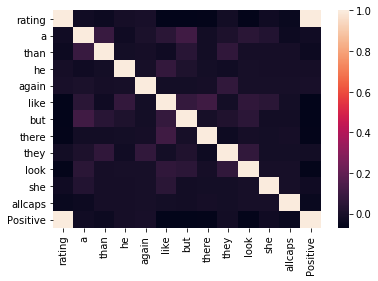

In [76]:
sns.heatmap(yelp.corr())

In [77]:
data = yelp[keywords + ['allcaps']]
target = yelp['Positive']

In [78]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 451


In [79]:
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 476


In [80]:
bnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 498


In [81]:
data_pathh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/amazon_cells_labelled.txt"
            )
amazon = pd.read_csv(data_pathh, delimiter= '\t', header=None)
amazon.columns = ['message', 'rating']
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    amazon[str(key)] = amazon.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
amazon.head()

,message,rating,a,than,he,again,like,but,there,they,look,she
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False


In [82]:
amazon['allcaps'] = amazon.message.str.isupper()
amazon['Positive'] = (amazon['rating'] == 1)
amazon.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,allcaps,Positive
0,So there is no way for me to plug it in here i...,0,True,False,False,False,False,False,True,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,False,False,False,True
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,True
3,Tied to charger for conversations lasting more...,0,False,True,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,True


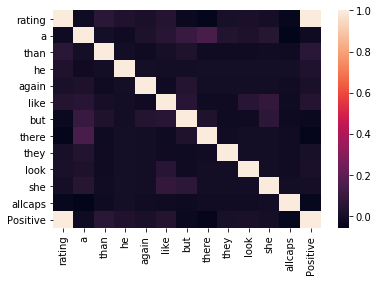

In [83]:
sns.heatmap(amazon.corr())

In [84]:
data = amazon[keywords + ['allcaps']]
target = amazon['Positive']

In [85]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 484


In [86]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 473


In [87]:
bnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 479


In [88]:
data_pathhh = ("https://raw.githubusercontent.com/vohoang2005/FirstProject-/master/imdb_labelled.txt"
            )
imdb = pd.read_csv(data_pathhh, delimiter= '\t', header=None)
imdb.columns = ['message', 'rating']
keywords = ['a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    imdb[str(key)] = imdb.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
imdb.head()

,message,rating,a,than,he,again,like,but,there,they,look,she
0,"A very, very, very slow-moving, aimless movie ...",0,True,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,True,False,False,False,False,False,False,False,False,False


In [89]:
imdb['allcaps'] = imdb.message.str.isupper()
imdb['Positive'] = (imdb['rating'] == 1)
imdb.head()

,message,rating,a,than,he,again,like,but,there,they,look,she,allcaps,Positive
0,"A very, very, very slow-moving, aimless movie ...",0,True,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,0,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,0,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,0,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,1,True,False,False,False,False,False,False,False,False,False,False,True


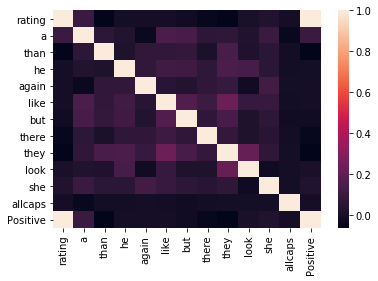

In [90]:
sns.heatmap(imdb.corr())

In [91]:
data = imdb[keywords + ['allcaps']]
target = imdb['rating']

In [92]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# Instantiate our model and store it in a new variable.
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 345


In [93]:
bnb = GaussianNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 345


In [94]:
bnb = MultinomialNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 347


'''''' The first dataset I pick to classify is Amazon. The words I use to classify is 'a', 'than', 'he', 'again', 'like', 'but', 'there', 'they', 'look', 'she'. And it turn out for Amazon that, using Multinomial, it have the most mislabeled points. Therefore, choosing Multinomial for this dataset is a better match than Gaussian and Bernoulli. For my choice of Naive Bayes, I going to choose MultinomialNB, since it always appear the highest. GaussianNB would be my second choice, then finally, BernoulliNB seem to even out very often (at least for these 3 dataset).''''''